In [1]:
#Import Dependencies
import pandas as pd
import numpy as np

#File to load
file_path = "Data/alcsales_August2020_codedfullfile.csv"

# Read Purchasing File and store into Pandas data frame
alcohol_sales_data = pd.read_csv(file_path)
alcohol_sales_data['Month - Year (Date)'] = pd.to_datetime(alcohol_sales_data['Month - Year (Word)'])
alcohol_sales_data.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
0,2017,1,2,1,103645,42598,593378,0.0718,Alaska,January,January 2017,1 2017,2017-01-01
1,2017,1,5,1,402885,165586,2455022,0.0674,Arkansas,January,January 2017,1 2017,2017-01-01
2,2017,1,8,1,733857,301615,4634346,0.0651,Colorado,January,January 2017,1 2017,2017-01-01
3,2017,1,9,1,412100,169373,3015481,0.0562,Connecticut,January,January 2017,1 2017,2017-01-01
4,2017,1,10,1,180388,74139,799550,0.0927,Delaware,January,January 2017,1 2017,2017-01-01


In [2]:
#TEST SCRIPT - Calculate total number of data points
data_points = len(alcohol_sales_data)
data_points

2265

In [3]:
#TEST SCRIPT - Calculate total number of data points per year
#Groupby
state_alcohol_sales_groupby = alcohol_sales_data.groupby(['State'])

#Find count of data point per state
count_per_state = state_alcohol_sales_groupby.size()
count_per_state.head()

State
Alaska         132
Arkansas       132
Colorado       132
Connecticut    129
Delaware       129
dtype: int64

In [4]:
# Count the total of screen names "SN" by age group and find sum of all
total_ethanol = state_alcohol_sales_groupby["Gallons"].sum()
total_ethanol.head()


State
Alaska          66763764
Arkansas       211641222
Colorado       562826422
Connecticut    270652431
Delaware       101224349
Name: Gallons, dtype: int64

In [5]:
total_population = state_alcohol_sales_groupby["Population"].sum()
total_population.head()

State
Alaska          77997828
Arkansas       325696704
Colorado       623966136
Connecticut    389340432
Delaware       104423427
Name: Population, dtype: int64

In [6]:
grouped_state_df = pd.DataFrame({
    "Count": count_per_state,
    "Gallons": total_ethanol,
    "Total Population": total_population
})

grouped_state_df

,Count,Gallons,Total Population
State,,,
Alaska,132,66763764,77997828
Arkansas,132,211641222,325696704
Colorado,132,562826422,623966136
Connecticut,129,270652431,389340432
Delaware,129,101224349,104423427
Florida,129,1963678488,2323138986
Illinois,132,1140012903,1389969696
Kansas,88,214345767,208149040
Kentucky,132,326617001,486159252


In [7]:
#Alaska only
alaska_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Alaska']
alaska_df.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
0,2017,1,2,1,103645,42598,593378,0.0718,Alaska,January,January 2017,1 2017,2017-01-01
18,2017,1,2,2,140499,18124,593378,0.0305,Alaska,January,January 2017,1 2017,2017-01-01
36,2017,1,2,3,787407,35433,593378,0.0597,Alaska,January,January 2017,1 2017,2017-01-01
52,2017,2,2,1,120929,49702,593378,0.0838,Alaska,February,February 2017,2 2017,2017-02-01
70,2017,2,2,2,163072,21036,593378,0.0355,Alaska,February,February 2017,2 2017,2017-02-01


In [8]:
#Groupby year

alaska_by_year = alaska_df.groupby(['Month - Year (Date)'])


In [9]:
# Find sum of gallons
alaska_total_gallons = alaska_by_year["Gallons"].sum()
alaska_total_gallons.head()

Month - Year (Date)
2017-01-01    1031551
2017-02-01    1129711
2017-03-01    1453069
2017-04-01    1367197
2017-05-01    1841678
Name: Gallons, dtype: int64

In [10]:
# Find sum of ethanol
alaska_total_ethanol = alaska_by_year["Ethanol"].sum()
alaska_total_ethanol.head()

Month - Year (Date)
2017-01-01     96155
2017-02-01    108795
2017-03-01    134456
2017-04-01    123712
2017-05-01    159711
Name: Ethanol, dtype: int64

In [11]:
# Find average of population
alaska_avg_pop = alaska_by_year["Population"].mean()
alaska_avg_pop.head()

Month - Year (Date)
2017-01-01    593378
2017-02-01    593378
2017-03-01    593378
2017-04-01    593378
2017-05-01    593378
Name: Population, dtype: int64

In [12]:
# Find average pc
alaska_avg_pc = alaska_by_year["PerCapita"].mean()
alaska_avg_pc.head()

Month - Year (Date)
2017-01-01    0.054000
2017-02-01    0.061133
2017-03-01    0.075533
2017-04-01    0.069500
2017-05-01    0.089733
Name: PerCapita, dtype: float64

In [13]:
cleaned_alaska_df = pd.DataFrame({
    "Gallons": alaska_total_gallons,
    "Ethanol": alaska_total_ethanol,
    "Population": alaska_avg_pop,
    "PerCapita": alaska_avg_pc
    
})

cleaned_alaska_df

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,1031551,96155,593378,0.054000
2017-02-01,1129711,108795,593378,0.061133
2017-03-01,1453069,134456,593378,0.075533
2017-04-01,1367197,123712,593378,0.069500
2017-05-01,1841678,159711,593378,0.089733
2017-06-01,2062322,180285,593378,0.101267
2017-07-01,1771102,152218,593378,0.085533
2017-08-01,2062734,178722,593378,0.100367
2017-09-01,1426524,133646,593378,0.075100


In [14]:
#Import matplotlib dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

Text(0, 0.5, 'Gallons of Alcohol')

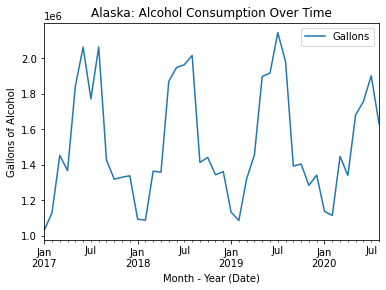

In [15]:
#Plot Alaska
cleaned_alaska_df.plot.line( y='Gallons', title="Alaska: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [20]:
#Arkansas only
arkansas_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Arkansas']

#Groupby year
arkansas_by_year = arkansas_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
arkansas_total_gallons = arkansas_by_year["Gallons"].sum()

# Find sum of ethanol
arkansas_total_ethanol = arkansas_by_year["Ethanol"].sum()

arkansas_avg_pop = arkansas_by_year["Population"].mean()

# Find average pc
arkansas_avg_pc = arkansas_by_year["PerCapita"].mean()

cleaned_arkansas_df = pd.DataFrame({
    "Gallons": arkansas_total_gallons,
    "Ethanol": arkansas_total_ethanol,
    "Population": arkansas_avg_pop,
    "PerCapita": arkansas_avg_pc
    
})

cleaned_arkansas_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,4254529,376831,2455022,0.051133
2017-02-01,4095944,304688,2455022,0.041367
2017-03-01,4362869,327557,2455022,0.044467
2017-04-01,4801439,366677,2455022,0.049800
2017-05-01,5001547,358703,2455022,0.048700


Text(0, 0.5, 'Gallons of Alcohol')

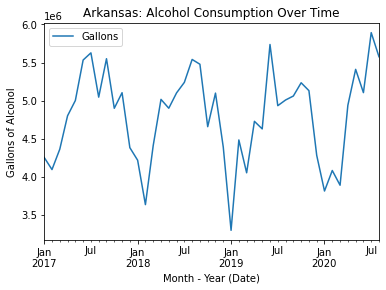

In [19]:
#Plot Arkansas
cleaned_arkansas_df.plot.line( y='Gallons', title="Arkansas: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [22]:
#Colorado only
colorado_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Colorado']

#Groupby year
colorado_by_year = colorado_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
colorado_total_gallons = colorado_by_year["Gallons"].sum()

# Find sum of ethanol
colorado_total_ethanol = colorado_by_year["Ethanol"].sum()

colorado_avg_pop = colorado_by_year["Population"].mean()

# Find average pc
colorado_avg_pc = colorado_by_year["PerCapita"].mean()

cleaned_colorado_df = pd.DataFrame({
    "Gallons": colorado_total_gallons,
    "Ethanol": colorado_total_ethanol,
    "Population": colorado_avg_pop,
    "PerCapita": colorado_avg_pc
    
})

cleaned_colorado_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,10061858,817722,4634346,0.058800
2017-02-01,10381811,931925,4634346,0.067033
2017-03-01,12518995,1113251,4634346,0.080067
2017-04-01,11271388,968862,4634346,0.069700
2017-05-01,13389596,1161497,4634346,0.083533


Text(0, 0.5, 'Gallons of Alcohol')

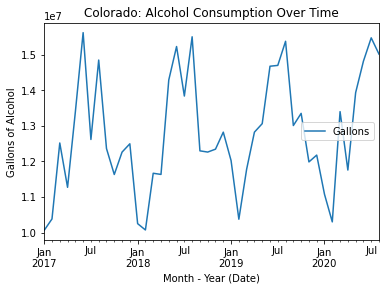

In [23]:
#Plot Colorado
cleaned_colorado_df.plot.line( y='Gallons', title="Colorado: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

In [24]:
#Connecticut only
connecticut_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Connecticut']

#Groupby year
connecticut_by_year = connecticut_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
connecticut_total_gallons = connecticut_by_year["Gallons"].sum()

# Find sum of ethanol
connecticut_total_ethanol = connecticut_by_year["Ethanol"].sum()

connecticut_avg_pop = connecticut_by_year["Population"].mean()

# Find average pc
connecticut_avg_pc = connecticut_by_year["PerCapita"].mean()

cleaned_connecticut_df = pd.DataFrame({
    "Gallons": connecticut_total_gallons,
    "Ethanol": connecticut_total_ethanol,
    "Population": connecticut_avg_pop,
    "PerCapita": connecticut_avg_pc
    
})

cleaned_connecticut_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,4656852,427144,3015481,0.047233
2017-02-01,5160850,529699,3015481,0.058567
2017-03-01,6172341,599589,3015481,0.066267
2017-04-01,5930047,550922,3015481,0.060900
2017-05-01,7045182,653994,3015481,0.072300


Text(0, 0.5, 'Gallons of Alcohol')

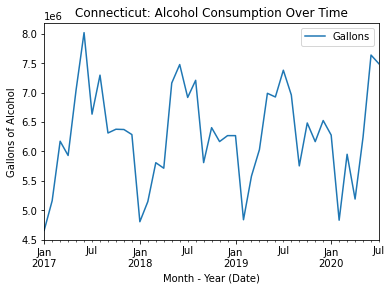

In [25]:
#Plot Colorado
cleaned_connecticut_df.plot.line( y='Gallons', title="Connecticut: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')